In [8]:
####### By Maha Alkhairy ########
## using python 3.5

import scipy.io
import numpy as np 
import random

data = scipy.io.loadmat("HW3_Data/data.mat")
X = data['X_Question2_3']

In [9]:
## kmeans 


def kmeans(data, K = 4, maxIterations = 1000): 

    ## the number of rows of the data
    number_of_features = np.shape(data)[0]

    N = np.shape(data)[1]

    ## randomly choose from the data 
    randomInts = [random.randint(1, N-1) for i in range(K)]

    # print "random ints ", randomInts

    centroids = [data[:, i] for i in randomInts] 

    # print "initial centers ", centroids

    for t in range(maxIterations): 
        old_centroids = list(centroids)
        Z = getZ(centroids, N, K, data)
        centroids = getCentriods(Z, N, K, data)

        # print "older ", old_centroids
        # print "newer ", centroids

        diff =  np.linalg.norm((np.array(centroids) - np.array(old_centroids)), ord = 2)
        # print diff 
        if diff == 0:
            return centroids, Z



def getZ(centroids, N, K, data): 
    """
    """  
    Z = np.zeros((N, K))

    # numpy.linalg.norm(x, ord=2)

    for i in range(N): 
        x_i = data[:, i]
        distances = list(map(lambda c: np.linalg.norm((x_i - c), ord=2), centroids))
        # print distances
        j = distances.index(min(distances))

        Z[i][j] = 1

    return Z 


def getCentriods(Z, N, K, data): 
    """
    """
    centroids = [0, 0, 0, 0]


    for j in range(K): 

        Z_j = Z[:, j]
        den = np.sum(Z_j, axis = 0)
        Z_data = Z_j * data

        # print "Z_data shape: ",  np.shape(Z_data)

        # print "Z data = ", Z_data
        # num = np.sum(Z_data)

        num = 0 

        for i in range(N): 
            Z_i_j = Z[i][j]
            x_i = data[:, i]
            num += (Z_i_j * x_i)
        # print "num = ", num

        centroids[j] = num/den

    # print "centroids after == ", centroids 

    return centroids

def getClusteredData(X, Z, k):
    wanted = Z[:, k]
    
    wanted_X = []
   
    for i in range(len(wanted)):
        if Z[i][k] == 1: 
            wanted_X.append(X[:, i])
            
    return wanted_X
  

In [10]:

centroids, Z = kmeans(X)


Original data


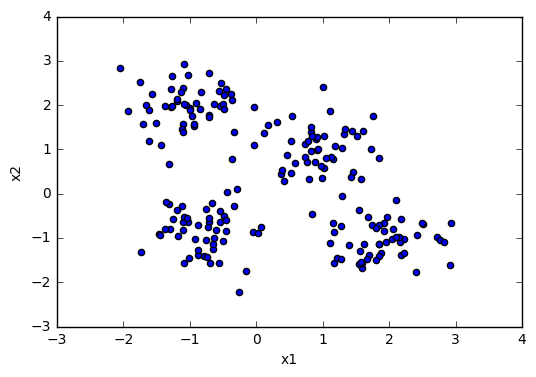

In [11]:
import matplotlib.pyplot as plt
from pandas import DataFrame


df = DataFrame(np.transpose(X), columns = ['x1', 'x2'])

df.plot(kind='scatter', x = 'x1', y = 'x2')

print("Original data")
plt.show()



K means results


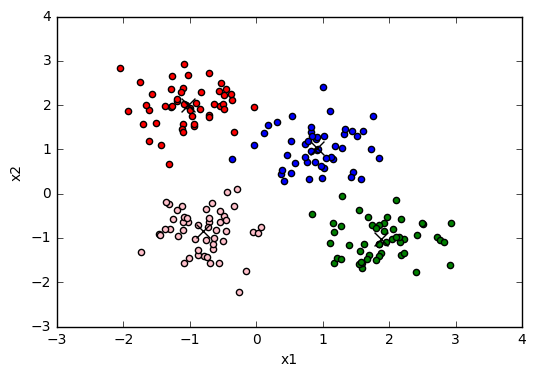

In [13]:
## plot the clustered kmeans data
import matplotlib.pyplot as plt
from pandas import DataFrame



def plotResults(X, Z, centroids):
    cluster1  =  getClusteredData(X, Z, 0)

    cluster2 =  getClusteredData(X, Z, 1)

    cluster3 =  getClusteredData(X, Z, 2)

    cluster4 =  getClusteredData(X, Z, 3)


    df = DataFrame(cluster1, columns = ['x1', 'x2'])

    c1 = df.plot(kind='scatter', x = 'x1', y = 'x2', color='pink')

    df = DataFrame(cluster2, columns = ['x1', 'x2'])

    c2 = df.plot(kind='scatter', x = 'x1', y = 'x2', color='blue', ax=c1)

    df = DataFrame(cluster3, columns = ['x1', 'x2'])

    c3 = df.plot(kind='scatter', x = 'x1', y = 'x2', color='green', ax=c2)


    df = DataFrame(cluster4, columns = ['x1', 'x2'])

    c4 = df.plot(kind='scatter', x = 'x1', y = 'x2', color='red', ax=c3)


    df = DataFrame(centroids, columns = ['x1', 'x2'])

    df.plot(kind='scatter', x = 'x1', y = 'x2', color='black', s = 100, marker = 'x', ax = c4)

    plt.show()

print("K means results")
plotResults(X, Z, centroids)

In [14]:
from scipy.linalg import eigh

In [20]:
def calculateSimilarity(x1, x2, sigma):
    """
    """
    norm_x1_x2 = np.linalg.norm((x1 - x2), 2) * np.linalg.norm((x1 - x2), 2)
    div = norm_x1_x2 / sigma
    # print div
    if div > 30: 
        similarity = 0
    else:
        similarity = np.exp(-1 * div)
    # print similarity
    return similarity

def makeSimilarityMatrix(data, sigma):
    N = np.shape(data)[1]
    W = np.zeros((N, N))
    for i in range(N): 
        for j in range(N):
            x_i = data[:, i]
            x_j = data[:, j]
            W[i][j] = calculateSimilarity(x_i, x_j, sigma)

    return W, N


def makeDiogonalMatrix(W, N): 
    """ 
    """
    sum_W = np.sum(W, axis = 1)
    D = np.zeros((N, N))
    for i in range(N):
        D[i][i] = sum_W[i]
    return D


def spectralClustering(data, sigma, K = 4):
    W, N = makeSimilarityMatrix(X, 0.01)
    D = makeDiogonalMatrix(W, N)
    L = D - W

    _, H = eigh(L, eigvals= (0, 1))

    X_kmeans = np.transpose(H)
    return kmeans(X_kmeans, K = 4)

In [16]:
centroidsSC1, ZSC1 = spectralClustering(X, 0.001)

In [17]:
centroidsSC2, ZSC2 = spectralClustering(X, 0.01)

In [21]:
centroidsSC3, ZSC3 = spectralClustering(X, 0.1)

In [22]:
centroidsSC4, ZSC4 = spectralClustering(X, 1)

results of spectral clutering for sigma = 0.001


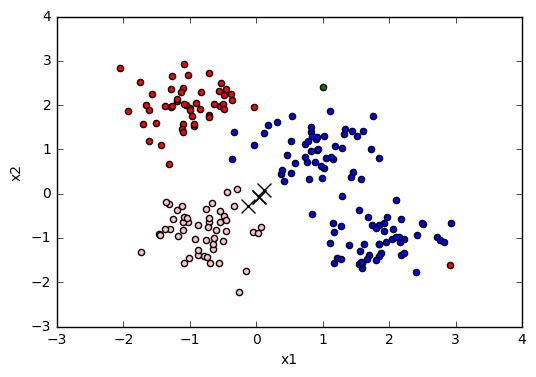

results of spectral clutering for sigma = 0.01


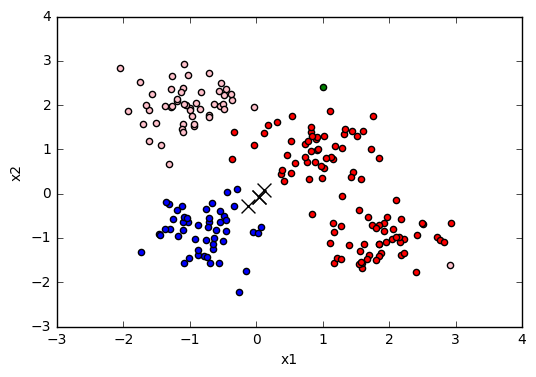

results of spectral clutering for sigma = 0.1


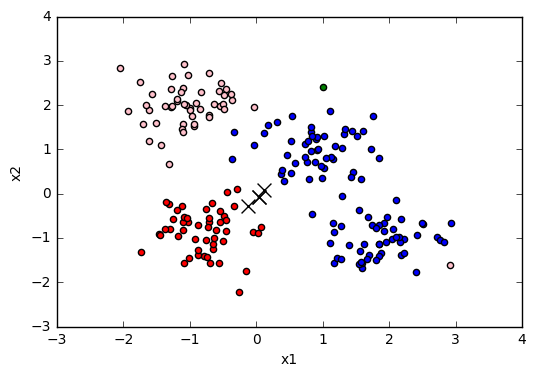

results of spectral clutering for sigma = 1


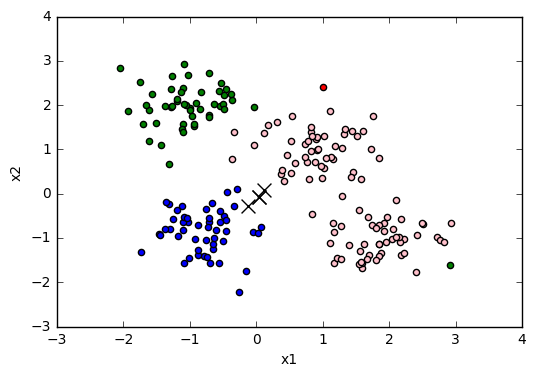

In [24]:
print("results of spectral clutering for sigma = 0.001")
plotResults(X, ZSC1, centroidsSC1)
print("results of spectral clutering for sigma = 0.01")
plotResults(X, ZSC2, centroidsSC2)
print("results of spectral clutering for sigma = 0.1")
plotResults(X, ZSC3, centroidsSC3)
print("results of spectral clutering for sigma = 1")
plotResults(X, ZSC4, centroidsSC4)